In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False,'figure.figsize':(20,10)}, style='darkgrid')

In [2]:
DF = pd.read_csv('~/한국언론진흥재단_뉴스빅데이터_뉴스토픽_20121231.csv', encoding='cp949')
DF

,일자\t,순위,토픽,토픽키워드
0,2012-01-01,1,유럽 재정 위기 증시,"최대_변수,정권교체_주목,선거,증시,실물경제_본격_위축,유럽_위기,재정,교체,회복,..."
1,2012-01-01,2,새해 예산안 국회 본회의 통과,"면죄부,본회의,연속_합의_처리_불발,적발,한국판,내장,연속_합의,연말,새해_예산안_..."
2,2012-01-01,3,삼성 이건희 회장 글로벌 위기 투자,"참석,회장,삼성_이건희,이건희,투자,연속,재용,어떤_화두,부자,글로벌,어떤,이건희_..."
3,2012-01-01,4,경찰 학교 폭력 구속 수사 확대,"경찰,확대,추진,사범,서클,광주_중학생,고소,불량,폭행,수사,학교,학생,구속수사_확..."
4,2012-01-01,5,주택분양 시장 블루 새해 문 연다,"강남,투자,미성동_주택화재,건설,보금자리,서울_청룡동,시장,상표권,가시밭길,도시,블..."
...,...,...,...,...
3655,2012-12-31,6,인수위 윤창중 수석대변인 인수위대변,"신용등급_강등,윤창중_대변인,자작극,사실상,인수위대변,계룡산업,한라건설,윤창중,강등..."
3656,2012-12-31,7,정상 내년 경제 전망 신중한 입장,"신중한,경제,입장,전망_신중한,내년,정상,전망,내년_경제,신중한_입장"
3657,2012-12-31,8,마지막날 전국 꽁꽁 새해 첫날 예보,"서해안,세밑_한파_기승,전국_기숙형,기숙,지역,기숙형,자동차,호남,해돋이,새해_첫날..."
3658,2012-12-31,9,피죤 회장 횡령 배임 혐의 기소,"회장,原電,진상_조사,공모,새마을금고,이윤재_피죤_회장,연예기획사_대표_기소,회장_..."


In [3]:
DF.dtypes

일자\t     object
순위        int64
토픽       object
토픽키워드    object
dtype: object

In [4]:
DF = DF.drop("순위", axis = 1)
DF.head

<bound method NDFrame.head of             일자\t                   토픽  \
0     2012-01-01          유럽 재정 위기 증시   
1     2012-01-01     새해 예산안 국회 본회의 통과   
2     2012-01-01  삼성 이건희 회장 글로벌 위기 투자   
3     2012-01-01    경찰 학교 폭력 구속 수사 확대   
4     2012-01-01   주택분양 시장 블루 새해 문 연다   
...          ...                  ...   
3655  2012-12-31  인수위 윤창중 수석대변인 인수위대변   
3656  2012-12-31   정상 내년 경제 전망 신중한 입장   
3657  2012-12-31  마지막날 전국 꽁꽁 새해 첫날 예보   
3658  2012-12-31    피죤 회장 횡령 배임 혐의 기소   
3659  2012-12-31     미국 한인 관광버스 추락 사망   

                                                  토픽키워드  
0     최대_변수,정권교체_주목,선거,증시,실물경제_본격_위축,유럽_위기,재정,교체,회복,...  
1     면죄부,본회의,연속_합의_처리_불발,적발,한국판,내장,연속_합의,연말,새해_예산안_...  
2     참석,회장,삼성_이건희,이건희,투자,연속,재용,어떤_화두,부자,글로벌,어떤,이건희_...  
3     경찰,확대,추진,사범,서클,광주_중학생,고소,불량,폭행,수사,학교,학생,구속수사_확...  
4     강남,투자,미성동_주택화재,건설,보금자리,서울_청룡동,시장,상표권,가시밭길,도시,블...  
...                                                 ...  
3655  신용등급_강등,윤창중_대변인,자작극,사실상,인수위대변,계룡산업,한라건설,윤창중,강등...  
3656         

In [5]:
topic_lis = DF["토픽키워드"]
topic_lis = topic_lis.tolist()
topic_lis

['최대_변수,정권교체_주목,선거,증시,실물경제_본격_위축,유럽_위기,재정,교체,회복,실물경제,오바마,유럽,위기,재선,정권,경제회복,최대,주목,경제,위축,변수',
 '면죄부,본회의,연속_합의_처리_불발,적발,한국판,내장,연속_합의,연말,새해_예산안_본회의_처리,버핏세,처리_언제나,처리,기부금,예산안_처리,단독_처리,영수증_적발,청목회,기습처리,여야,입법로비_면죄부법안_기습_처리,예정,국회,입법,국세청,새해,언제나,국회_예산안,로비,법사위,제대로,법안,입법로비_면죄부법안,가짜_기부금,종교,합의_처리,청목회법,한국판_버핏세,사법,방송,단독,소득,예산안,기습,판매대행법,한나라당,새해_예산안,불발,영수증,기관,사법처리,종교기관,통과,기부,공제,연속,기습_처리,사실상,박근혜,처리_불발,국회_법사위,방송광고판매대행법,합의,예산,가짜,국회_기습처리,본회의_처리,광고',
 '참석,회장,삼성_이건희,이건희,투자,연속,재용,어떤_화두,부자,글로벌,어떤,이건희_회장,위기,이재용,주식,이건희_어떤,주식부자,이건희_어떤_화두,화두,삼성',
 '경찰,확대,추진,사범,서클,광주_중학생,고소,불량,폭행,수사,학교,학생,구속수사_확대,구속_수사,학교_폭력,광주,중학,구속수사,사망,학교폭력_사범,해체,초등생_학교폭력,방침,고소장,폭행_학생_수사,학교폭력,광주_중학생_사망,구속,폭행_학생,초등,전쟁,불량서클,폭력',
 '강남,투자,미성동_주택화재,건설,보금자리,서울_청룡동,시장,상표권,가시밭길,도시,블루,릴까,도시형,분양,연다,화재,청룡동,정릉,손절매,심리,새해,주택분양_시장,주택_손절매_전략,피해,주택_구매,보금자리주택,원칙,서울,전략,패소,상표권_침해소송,동부건설,주택_손절매,상표,강남_오피스텔,주택,서울_정릉동,정릉동,서울_정릉동_주택_불,구매,선물,동부주택건설,상표권_침해소송_패소,침해,투자심리,새해_문_연다,오피스텔,소송,미성동,화상,동부',
 '대비,전년대비,감소,무역,전년,흑자,달러',
 '유해,물다,김정일_사망직후,추도,비상대기,보수단체_보안법,추도기간,부인_이수자,추도기간_종료

In [7]:
topic_key = []
topic_value = []


for word in topic_lis:
    word = word.split(',') #',' 기점으로 스트링 분리
    topic_key.append(word) #분리된 단어들을 리스트에 새로 정렬

for j in topic_key:
    j = list(set(j)) #중복 제거
    topic_value.append(j) #제거된 리스트를 새로운 리스트에 삽입
    
print(topic_value)

[['재정', '위기', '실물경제', '경제', '재선', '실물경제_본격_위축', '회복', '오바마', '최대', '유럽_위기', '증시', '정권교체_주목', '주목', '변수', '선거', '경제회복', '위축', '정권', '교체', '유럽', '최대_변수'], ['가짜', '적발', '단독', '언제나', '기습_처리', '광고', '로비', '통과', '제대로', '기부', '연말', '한국판', '예산안_처리', '국회_기습처리', '처리', '처리_언제나', '예산안', '청목회법', '연속_합의', '소득', '새해', '영수증', '국회', '합의_처리', '공제', '입법로비_면죄부법안', '방송광고판매대행법', '면죄부', '본회의_처리', '입법로비_면죄부법안_기습_처리', '청목회', '연속_합의_처리_불발', '사법', '기습처리', '박근혜', '국회_법사위', '불발', '기습', '단독_처리', '한국판_버핏세', '법안', '한나라당', '기관', '사법처리', '버핏세', '여야', '국세청', '연속', '가짜_기부금', '판매대행법', '내장', '법사위', '종교기관', '합의', '기부금', '처리_불발', '종교', '새해_예산안_본회의_처리', '영수증_적발', '방송', '새해_예산안', '국회_예산안', '입법', '본회의', '예정', '사실상', '예산'], ['삼성', '위기', '회장', '부자', '주식', '주식부자', '이재용', '화두', '어떤', '어떤_화두', '투자', '참석', '이건희_회장', '이건희_어떤', '연속', '삼성_이건희', '글로벌', '이건희', '재용', '이건희_어떤_화두'], ['수사', '경찰', '구속수사', '불량', '학교_폭력', '구속', '광주_중학생_사망', '학교폭력_사범', '사범', '중학', '폭행_학생', '광주_중학생', '서클', '해체', '고소장', '구속_수사', '폭행_학생_수사', '구속수사_확대', '학생', '초등생_학교

In [9]:
topic_words = {}
for k in range(len(topic_value)):
    for i in topic_value[k]:
        if i not in topic_words:
            topic_words[i] = 1 #최초 언어
        elif i in topic_words:
            topic_words[i] += 1 #중복 언어
print(topic_words)

{'재정': 67, '위기': 142, '실물경제': 3, '경제': 217, '재선': 10, '실물경제_본격_위축': 1, '회복': 57, '오바마': 55, '최대': 127, '유럽_위기': 7, '증시': 88, '정권교체_주목': 1, '주목': 50, '변수': 27, '선거': 130, '경제회복': 4, '위축': 10, '정권': 44, '교체': 21, '유럽': 92, '최대_변수': 1, '가짜': 13, '적발': 31, '단독': 21, '언제나': 1, '기습_처리': 1, '광고': 23, '로비': 28, '통과': 27, '제대로': 8, '기부': 12, '연말': 9, '한국판': 2, '예산안_처리': 2, '국회_기습처리': 1, '처리': 54, '처리_언제나': 1, '예산안': 8, '청목회법': 1, '연속_합의': 1, '소득': 24, '새해': 12, '영수증': 2, '국회': 121, '합의_처리': 1, '공제': 8, '입법로비_면죄부법안': 1, '방송광고판매대행법': 1, '면죄부': 4, '본회의_처리': 1, '입법로비_면죄부법안_기습_처리': 1, '청목회': 1, '연속_합의_처리_불발': 1, '사법': 17, '기습처리': 1, '박근혜': 255, '국회_법사위': 3, '불발': 8, '기습': 3, '단독_처리': 2, '한국판_버핏세': 1, '법안': 30, '한나라당': 21, '기관': 48, '사법처리': 5, '버핏세': 3, '여야': 73, '국세청': 7, '연속': 55, '가짜_기부금': 1, '판매대행법': 1, '내장': 1, '법사위': 5, '종교기관': 1, '합의': 56, '기부금': 4, '처리_불발': 2, '종교': 3, '새해_예산안_본회의_처리': 1, '영수증_적발': 1, '방송': 31, '새해_예산안': 3, '국회_예산안': 1, '입법': 15, '본회의': 16, '예정': 30, '사실상': 27, '예산': 30, '삼성'

In [10]:
word_df = pd.DataFrame(topic_words.items()) #딕셔너리 --> 데이터 프레임 
word_df.columns = ['단어', '빈도'] #칼럼 명 설정
topic_word_df = word_df.sort_values(['빈도'],ascending = False).head(20) #빈도 기준 내림차순 정렬 및 상위 20개만 추출
topic_word_df

,단어,빈도
371,민주,321
761,후보,311
369,대선,268
55,박근혜,255
405,의원,239
730,검찰,235
1101,대표,225
3,경제,217
581,한국,214
1842,조사,213


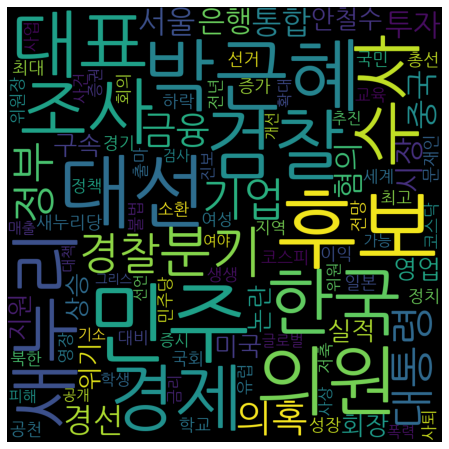

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'C:/Users/day1/Downloads/나눔 글꼴/나눔고딕/NanumGothic.ttf',
                     background_color = "black",
                     width = 1000,
                     height = 1000,
                     max_words = 100,
                     max_font_size = 200).generate_from_frequencies(topic_words)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()